# Árvores de regressão - exercícios 01

*Atenção! Devido descontinuação da base de imóveis boston os alunos devem utilizar a base de dados que se encontra em anexo.*

A base que utilizaremos contem os dados dos imóveis da california.
Considerem como variável Target (a ser prevista) a coluna median_house_value.
O dataset é muito semelhante ao de boston, contendo localização, quartos, banheiros e outras variáveis interessantes para construção do modelo.

In [39]:
import pandas as pd

import seaborn as sns

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error


### 1. Certifique-se de que esta base está no formato adequado para o scikitlearn.
ok, essa tarefa é tão fácil que você vai até desconfiar. Mas é preciso ter confiança sobre os dados que se usa ;)

In [4]:
df = pd.read_csv(r"housing.csv")
df.head()



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
print(df.isnull().sum())

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [6]:
df['ocean_proximity'].value_counts()
# pela quantidade de valor, acho que não vai ser interessante transformar em dummie


ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

### 2.  Visualize a matriz de correlação, e veja se aparentemente você encontra alguma variável com potencial preditivo interessante.

In [7]:
df.columns
#median_house_value

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

C:\Users\felip\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\felip\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


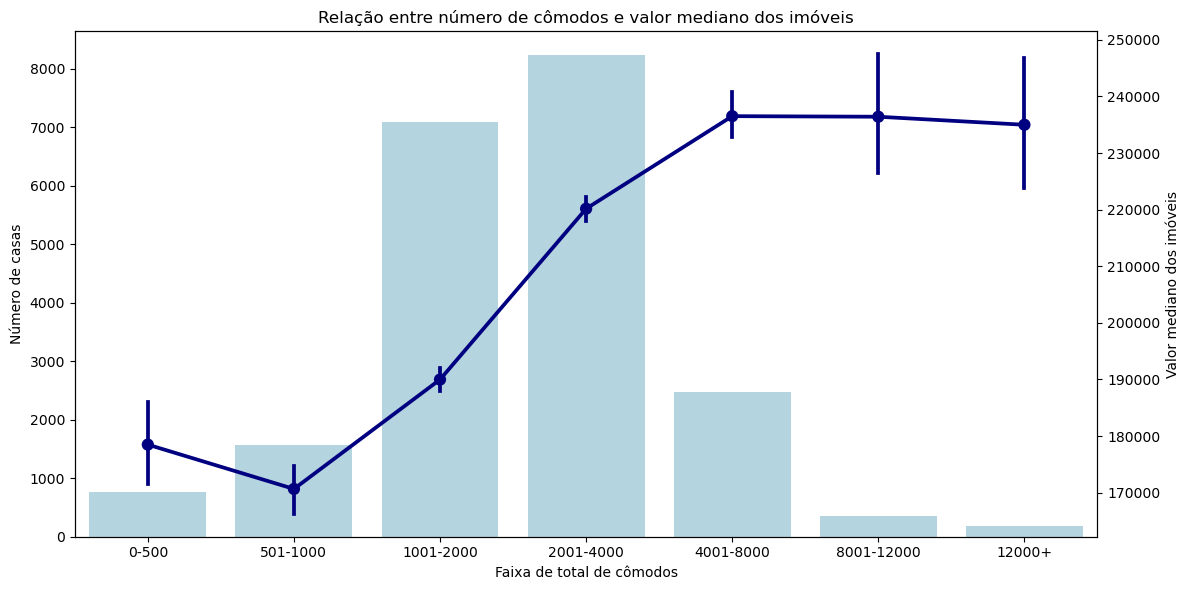

In [8]:
#Vou precisar quebrar me grupos, porque o Jupter não conseguiu rodar com milhares de valores unicos no eixo X. 

df["faixa_comodos"] = pd.cut(df["total_rooms"],bins=[0, 500, 1000, 2000, 4000, 8000, 12000, 
                                                     df["total_rooms"].max()], 
                             labels=["0-500", "501-1000", "1001-2000", "2001-4000", "4001-8000", "8001-12000", "12000+"])

plt.rc('figure', figsize=(12, 6))
fig, ax1 = plt.subplots()


sns.countplot(x="faixa_comodos", data=df, ax=ax1, color="lightblue")
ax1.set_ylabel("Número de casas")
ax1.set_xlabel("Faixa de total de cômodos")


ax2 = ax1.twinx()
sns.pointplot(x="faixa_comodos", y="median_house_value", data=df,
              ax=ax2, color="navy", errorbar=('ci', 90))
ax2.set_ylabel("Valor mediano dos imóveis")

plt.title("Relação entre número de cômodos e valor mediano dos imóveis")
plt.tight_layout()
plt.show()



C:\Users\felip\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\felip\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


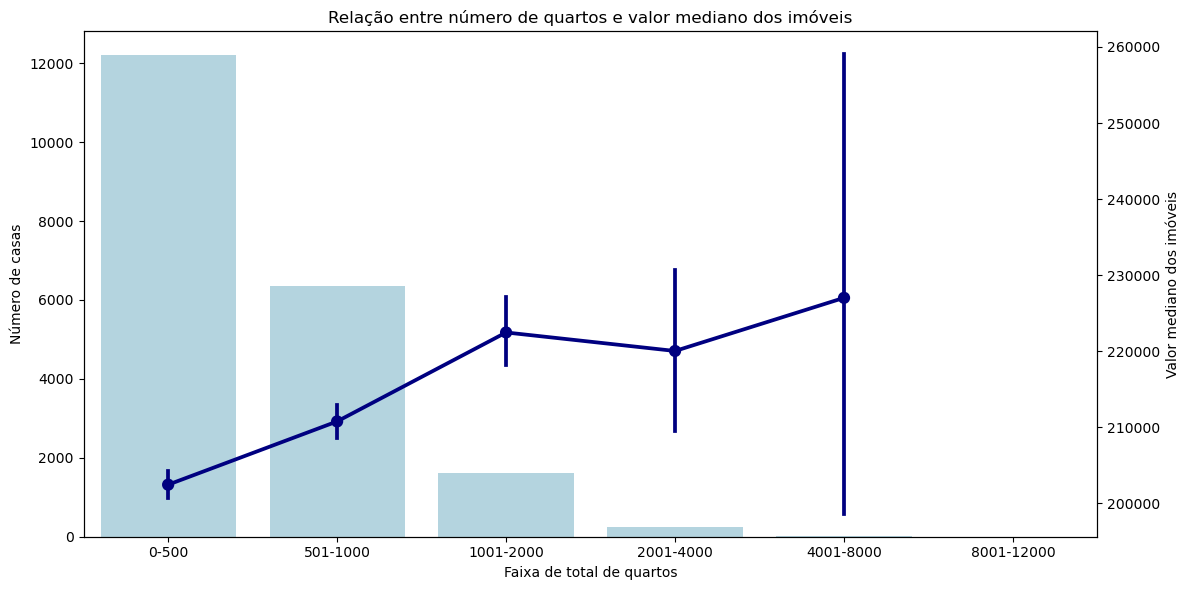

In [15]:
#Vou precisar quebrar me grupos, porque o Jupter não conseguiu rodar com milhares de valores unicos no eixo X. 

df["faixa_quartos"] = pd.cut(df["total_bedrooms"],bins=[0, 500, 1000, 2000, 4000, 8000, 
                                                     df["total_rooms"].max()], 
                             labels=["0-500", "501-1000", "1001-2000", "2001-4000", "4001-8000", "8001-12000"])

plt.rc('figure', figsize=(12, 6))
fig, ax1 = plt.subplots()


sns.countplot(x="faixa_quartos", data=df, ax=ax1, color="lightblue")
ax1.set_ylabel("Número de casas")
ax1.set_xlabel("Faixa de total de quartos")


ax2 = ax1.twinx()
sns.pointplot(x="faixa_quartos", y="median_house_value", data=df,
              ax=ax2, color="navy", errorbar=('ci', 90))
ax2.set_ylabel("Valor mediano dos imóveis")

plt.title("Relação entre número de quartos e valor mediano dos imóveis")
plt.tight_layout()
plt.show()



C:\Users\felip\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\felip\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


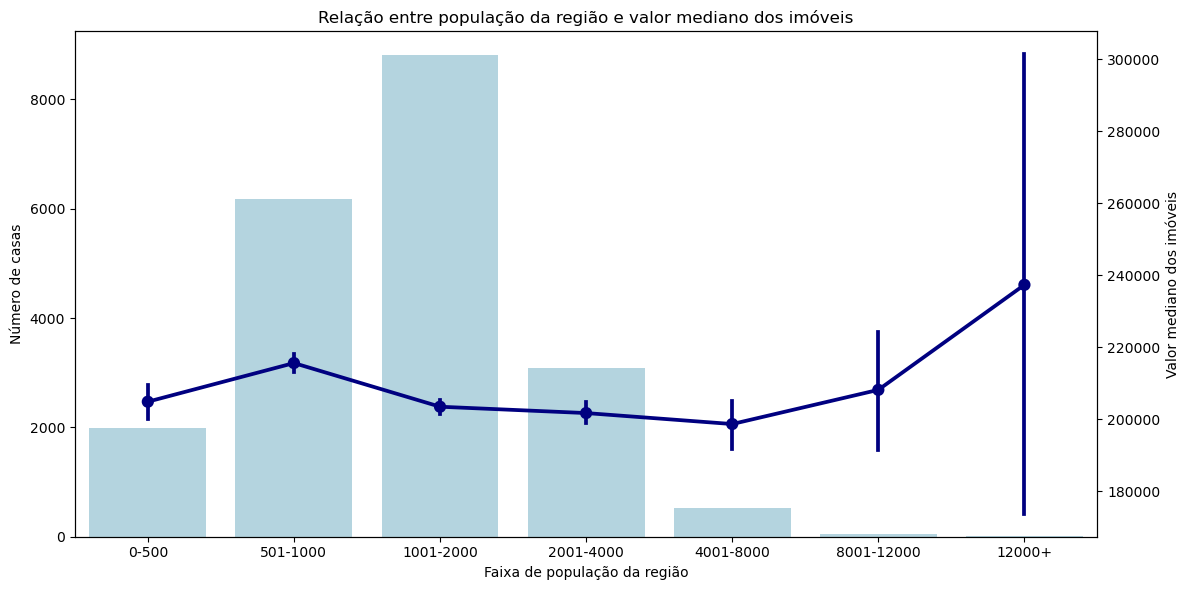

In [9]:

df["faixa_populacao"] = pd.cut(df["population"],
                               bins=[0, 500, 1000, 2000, 4000, 8000, 12000, df["population"].max()],
                               labels=["0-500", "501-1000", "1001-2000", "2001-4000", "4001-8000", "8001-12000", "12000+"])


plt.rc('figure', figsize=(12, 6))
fig, ax1 = plt.subplots()


sns.countplot(x="faixa_populacao", data=df, ax=ax1, color="lightblue")
ax1.set_ylabel("Número de casas")
ax1.set_xlabel("Faixa de população da região")


ax2 = ax1.twinx()
sns.pointplot(x="faixa_populacao", y="median_house_value", data=df,
              ax=ax2, color="navy", errorbar=('ci', 90))
ax2.set_ylabel("Valor mediano dos imóveis")

plt.title("Relação entre população da região e valor mediano dos imóveis")
plt.tight_layout()
plt.show()


In [10]:
df.columns


Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'faixa_comodos',
       'faixa_populacao'],
      dtype='object')

In [11]:

df['median_income'].max()

15.0001

C:\Users\felip\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\felip\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


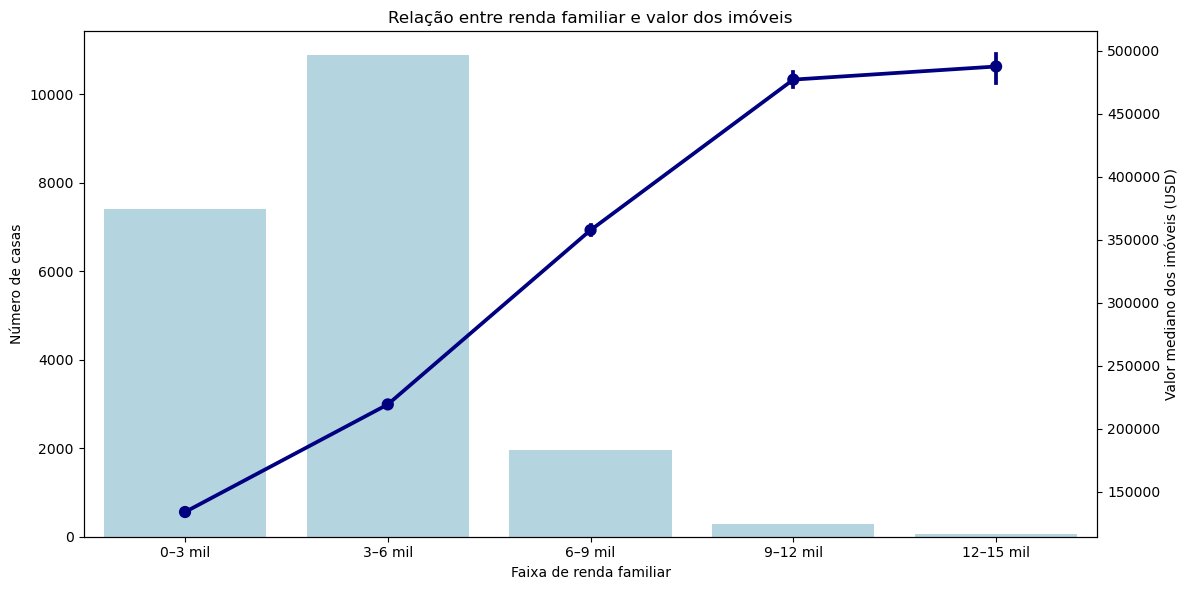

In [12]:
df["faixa_renda"] = pd.cut(
    df["median_income"],
    bins=[0, 3, 6, 9, 12, 15],
    labels=["0–3 mil", "3–6 mil", "6–9 mil", "9–12 mil", "12–15 mil"],
    include_lowest=True
)

plt.rc('figure', figsize=(12, 6))
fig, ax1 = plt.subplots()

sns.countplot(x="faixa_renda", data=df, ax=ax1, color="lightblue")
ax1.set_ylabel("Número de casas")
ax1.set_xlabel("Faixa de renda familiar")

ax2 = ax1.twinx()
sns.pointplot(x="faixa_renda", y="median_house_value", data=df,
              ax=ax2, color="navy", errorbar=('ci', 90))
ax2.set_ylabel("Valor mediano dos imóveis (USD)")

plt.title("Relação entre renda familiar e valor dos imóveis")
plt.tight_layout()
plt.show()


C:\Users\felip\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\felip\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\felip\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
 

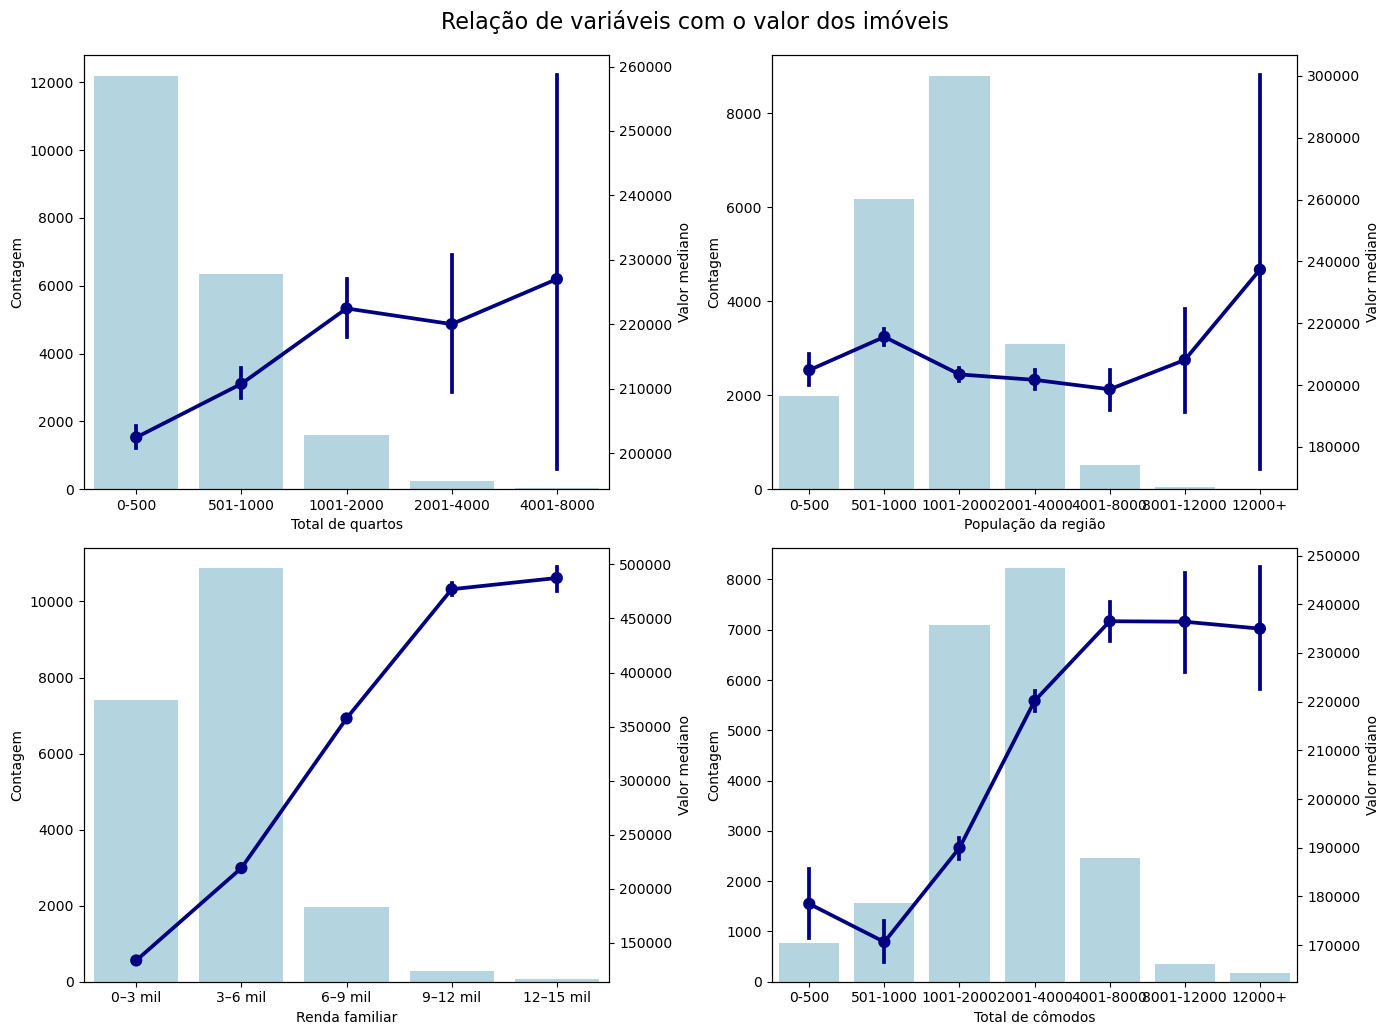

In [17]:
# tentando juntar tudo igual na aula
plt.rc('figure', figsize=(14, 10))
fig, axes = plt.subplots(2, 2)


df["faixa_quartos"] = pd.cut(df["total_bedrooms"], bins=[0, 500, 1000, 2000, 4000, df["total_bedrooms"].max()],
                             labels=["0-500", "501-1000", "1001-2000", "2001-4000", "4001-8000"])

ax1 = axes[0, 0]
sns.countplot(x="faixa_quartos", data=df, ax=ax1, color="lightblue")
ax1.set_ylabel("Contagem")
ax1.set_xlabel("Total de quartos")

ax1b = ax1.twinx()
sns.pointplot(x="faixa_quartos", y="median_house_value", data=df, ax=ax1b, color="navy", errorbar=('ci', 90))
ax1b.set_ylabel("Valor mediano")


df["faixa_populacao"] = pd.cut(df["population"], bins=[0, 500, 1000, 2000, 4000, 8000, 12000, df["population"].max()],
                               labels=["0-500", "501-1000", "1001-2000", "2001-4000", "4001-8000", "8001-12000", "12000+"])

ax2 = axes[0, 1]
sns.countplot(x="faixa_populacao", data=df, ax=ax2, color="lightblue")
ax2.set_ylabel("Contagem")
ax2.set_xlabel("População da região")

ax2b = ax2.twinx()
sns.pointplot(x="faixa_populacao", y="median_house_value", data=df, ax=ax2b, color="navy", errorbar=('ci', 90))
ax2b.set_ylabel("Valor mediano")


df["faixa_renda"] = pd.cut(df["median_income"], bins=[0, 3, 6, 9, 12, 15],
                           labels=["0–3 mil", "3–6 mil", "6–9 mil", "9–12 mil", "12–15 mil"],
                           include_lowest=True)

ax3 = axes[1, 0]
sns.countplot(x="faixa_renda", data=df, ax=ax3, color="lightblue")
ax3.set_ylabel("Contagem")
ax3.set_xlabel("Renda familiar")

ax3b = ax3.twinx()
sns.pointplot(x="faixa_renda", y="median_house_value", data=df, ax=ax3b, color="navy", errorbar=('ci', 90))
ax3b.set_ylabel("Valor mediano")


df["faixa_comodos"] = pd.cut(df["total_rooms"], bins=[0, 500, 1000, 2000, 4000, 8000, 12000, df["total_rooms"].max()],
                             labels=["0-500", "501-1000", "1001-2000", "2001-4000", "4001-8000", "8001-12000", "12000+"])

ax4 = axes[1, 1]
sns.countplot(x="faixa_comodos", data=df, ax=ax4, color="lightblue")
ax4.set_ylabel("Contagem")
ax4.set_xlabel("Total de cômodos")

ax4b = ax4.twinx()
sns.pointplot(x="faixa_comodos", y="median_house_value", data=df, ax=ax4b, color="navy", errorbar=('ci', 90))
ax4b.set_ylabel("Valor mediano")


plt.tight_layout()
plt.suptitle("Relação de variáveis com o valor dos imóveis", fontsize=16, y=1.03)
plt.show()


### 3. Separe os dados em validação e teste

In [19]:
df.dtypes

longitude              float64
latitude               float64
housing_median_age     float64
total_rooms            float64
total_bedrooms         float64
population             float64
households             float64
median_income          float64
median_house_value     float64
ocean_proximity         object
faixa_comodos         category
faixa_populacao       category
faixa_renda           category
faixa_quartos         category
dtype: object

In [29]:
df.isna().sum()


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
faixa_comodos           0
faixa_populacao         0
faixa_renda            49
faixa_quartos         207
dtype: int64

### 4. Treine duas árvores, uma com profundidade máxima = 8, outra com profundidade máxima = 2.

In [30]:
X = df.drop(columns = ['ocean_proximity', 'faixa_comodos','faixa_populacao', 'faixa_renda','faixa_quartos','median_house_value','total_bedrooms']).copy()

X = pd.get_dummies(X, drop_first = True)
print(X.info())
X.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   population          20640 non-null  float64
 5   households          20640 non-null  float64
 6   median_income       20640 non-null  float64
dtypes: float64(7)
memory usage: 1.1 MB
None


,longitude,latitude,housing_median_age,total_rooms,population,households,median_income
0,-122.23,37.88,41.0,880.0,322.0,126.0,8.3252
1,-122.22,37.86,21.0,7099.0,2401.0,1138.0,8.3014
2,-122.24,37.85,52.0,1467.0,496.0,177.0,7.2574
3,-122.25,37.85,52.0,1274.0,558.0,219.0,5.6431
4,-122.25,37.85,52.0,1627.0,565.0,259.0,3.8462


In [31]:
y = df["median_house_value"]


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2360873)

In [36]:
# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=8)

regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8)

### 5. Calcule o MSE de cada uma das árvores do item anterior para a base de treinamento e para a base de testes.

In [41]:
y_pred_train_1 = regr_1.predict(X_train)
y_pred_test_1  = regr_1.predict(X_test)

y_pred_train_2 = regr_2.predict(X_train)
y_pred_test_2  = regr_2.predict(X_test)

In [42]:
mse_train_1 = mean_squared_error(y_train, y_pred_train_1)
mse_test_1  = mean_squared_error(y_test, y_pred_test_1)

mse_train_2 = mean_squared_error(y_train, y_pred_train_2)
mse_test_2  = mean_squared_error(y_test, y_pred_test_2)

In [44]:
template = "Árvore com profundidade={0}: MSE treino = {1:,.2f} e o MSE teste = {2:,.2f}"

print(template.format(regr_1.get_depth(), mse_train_1, mse_test_1))
print(template.format(regr_2.get_depth(), mse_train_2, mse_test_2))

Árvore com profundidade=2: MSE treino = 7,411,385,612.54 e o MSE teste = 7,225,244,557.01
Árvore com profundidade=8: MSE treino = 3,638,458,548.50 e o MSE teste = 4,366,140,080.06


### 6. Com base nos resultados do item anterior, qual árvore te parece mais adequada?

Pelos resultados, parece que a arvore com profundidade 8 teve menos error no treino e no teste. Seguindo essa logica, ficariamos com a arvore com profundidade 8. 

### 7. Faça uma visualização gráfica dessa árvore. Vamos discutir importância de variável mais adiante, mas veja a sua árvore, e pense um pouco: qual variável te parece mais "importante" na árvore?

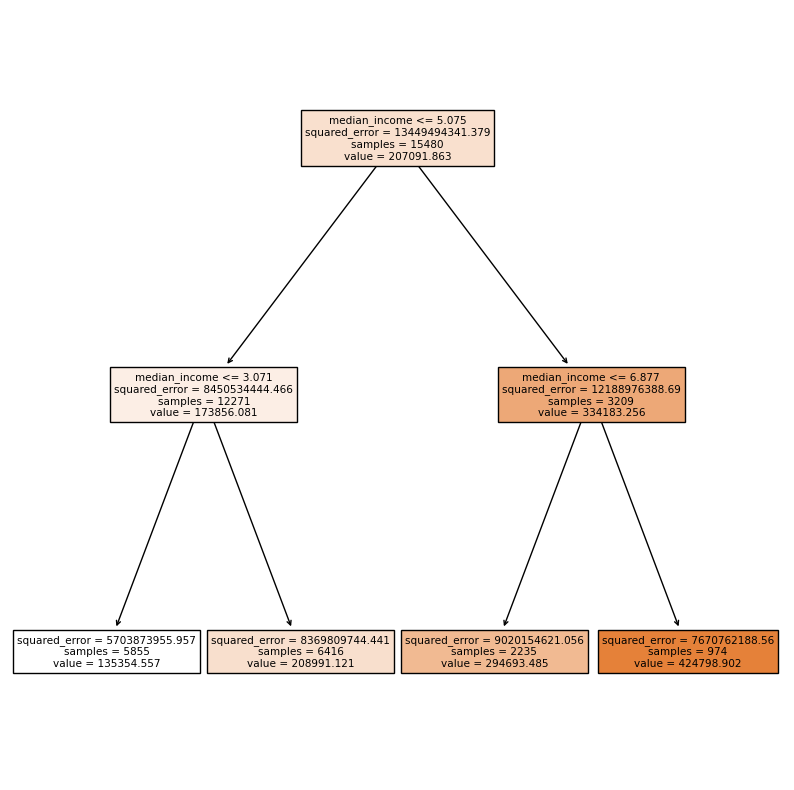

In [45]:
plt.rc('figure', figsize=(10, 10))
tp = tree.plot_tree(regr_1, 
                    feature_names=X.columns,  
                    filled=True) 

### Olhando para a arvore e para a construção de todo o codigo, a variavel de renda média me parece ser a mais imprortante na árvore